In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [12]:
df=pd.read_csv('baseball.csv')

In [13]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Checking the shape of the dataset

In [14]:
df.shape

(30, 17)

There are 30 rows and 17 columns

checking null values

In [15]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [16]:
# checking NA
df.isna().sum()

# No null and no NA values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
# Check the data types of the variables
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [17]:
#check the data
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


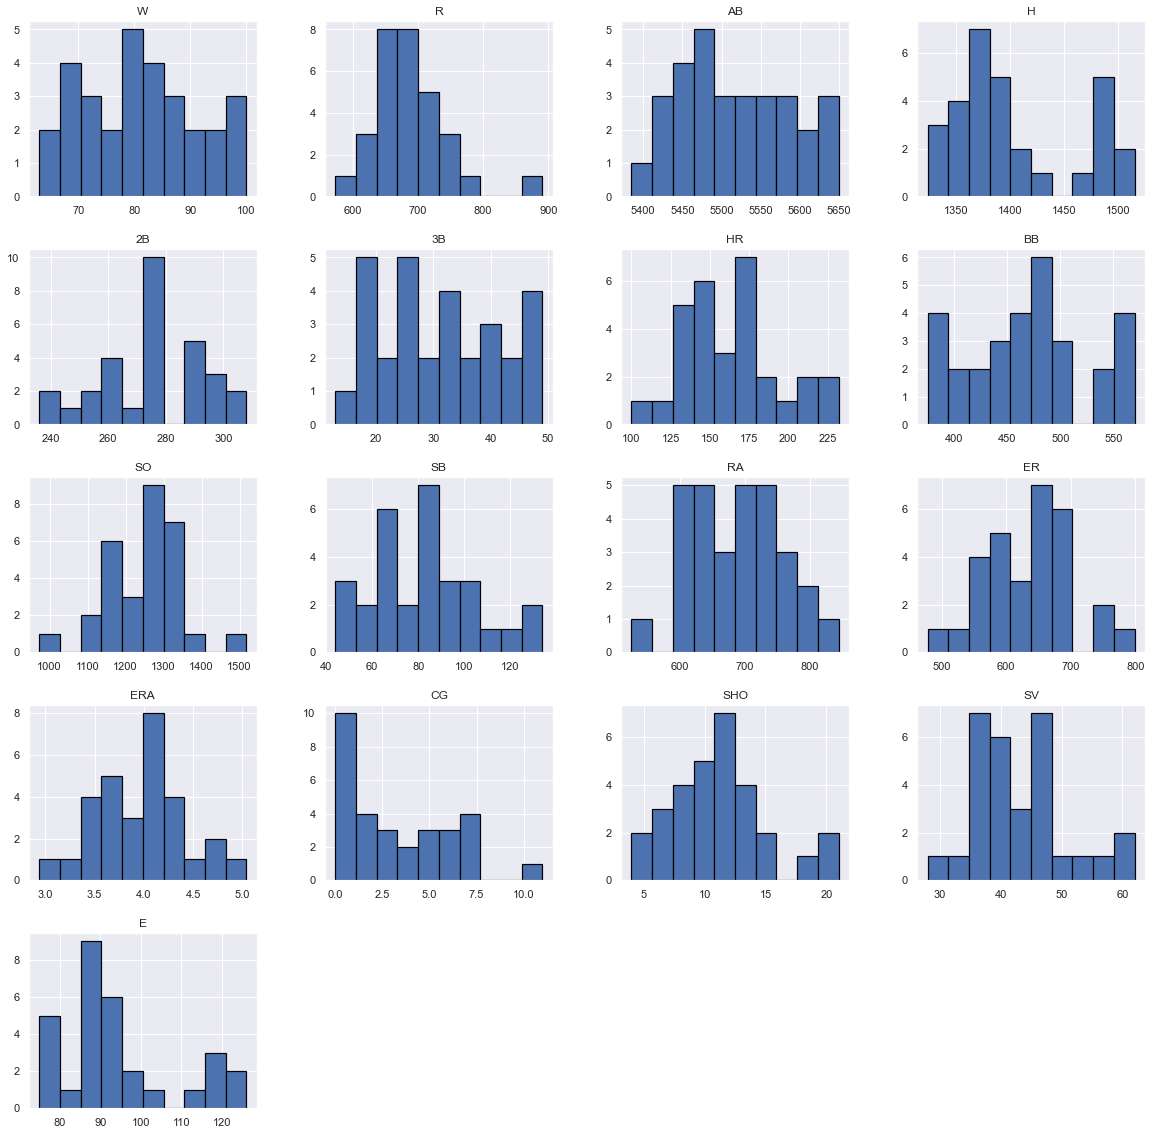

In [18]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

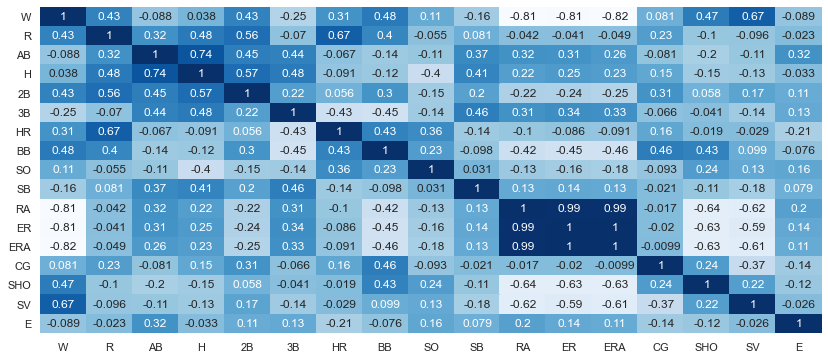

In [27]:
#Pearson Correlation
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(method='pearson'), annot=True, cbar=False, cmap='Blues')
plt.show()

<AxesSubplot:xlabel='3B', ylabel='W'>

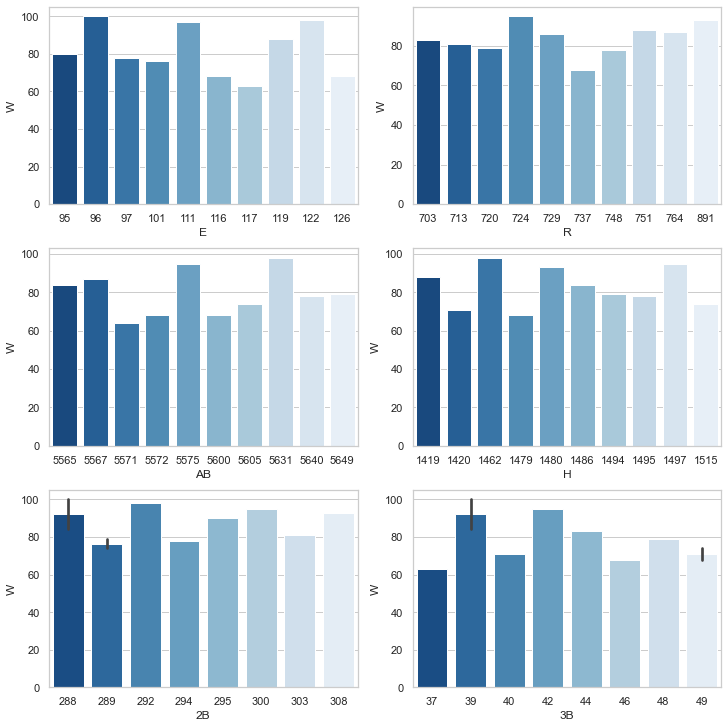

In [68]:
# Top Countries based on different criterias
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='E',y='W',
                        data=df.nlargest(10,'E'),
                        ax=axes[0,0],palette="Blues_r")
sns.barplot(x='R' ,y='W',
                        data=df.nlargest(10,'R'),
                        ax=axes[0,1],palette='Blues_r')
sns.barplot(x='AB' ,y='W',
                        data=df.nlargest(10,'AB'),
                        ax=axes[1,0],palette='Blues_r')
sns.barplot(x='H' ,y='W',
                        data=df.nlargest(10,'H'),
                        ax=axes[1,1],palette='Blues_r')
sns.barplot(x='2B' ,y='W',
                        data=df.nlargest(10,'2B'),
                        ax=axes[2,0],palette='Blues_r')
sns.barplot(x='3B' ,y='W',
                        data=df.nlargest(10,'3B'),
                        ax=axes[2,1],palette='Blues_r')

In [37]:
# train test data split

train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 22
Test data points : 8


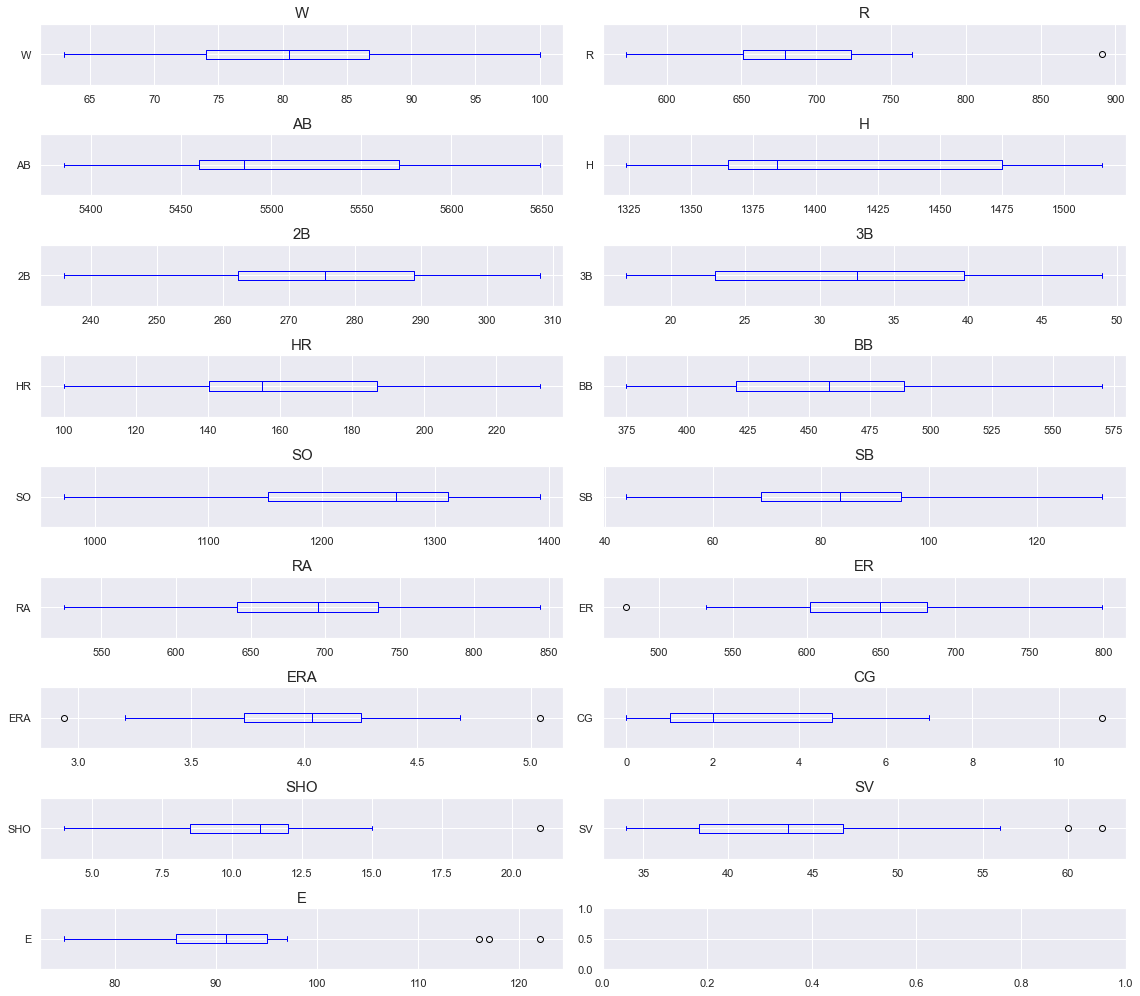

In [39]:
#Box Plot to check outliers:

fig, axes = plt.subplots(9,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(df.columns):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

In [40]:
features=['R','AB' ,'H' ,'2B' ,'3B' ,'HR' ,'BB','SO','SB'   ,'RA'   ,'ER'   ,
'ERA'  ,'CG'   ,'SHO' ,'SV'   ,'E']
target='W'

In [41]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
24,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
22,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
23,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79


In [51]:
for key, regressor in models.items():
    print(key)
    eval_model(regressor, X_train, y_train, X_test, y_test)
    print("\n\n")

logistic_regression
Train rmse :  0.0
Test rmse :  7.897784499465657



lasso
Train rmse :  2.20048130088475
Test rmse :  7.201763355178962



decision_tree
Train rmse :  0.0
Test rmse :  9.1583295420071



random_forest
Train rmse :  2.7332706016452484
Test rmse :  6.820274004759634





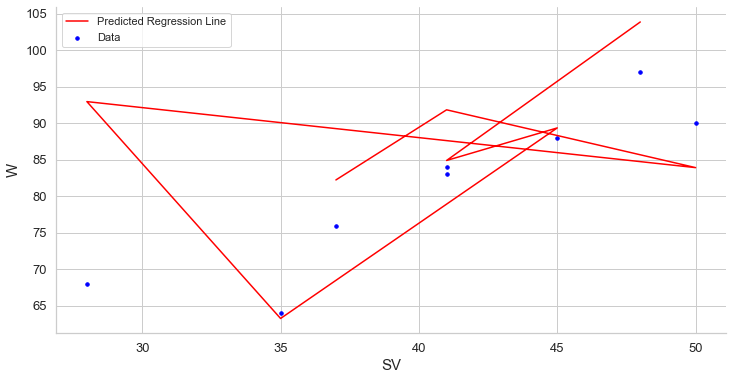

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test['SV'],y_test,color='blue',label="Data", s = 12)
plt.plot(X_test['SV'],lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("SV", fontsize=15)
plt.ylabel("W", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)